#### Actividad 2

In [2]:
#Tratamiento
import numpy as np
import pandas as pd

#Grafico
import matplotlib.pyplot as plt
import seaborn as sns

#Modelo
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap
from sklearn.metrics import pairwise_distances
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [3]:
iris = load_iris()

data = iris.data
target = iris.target

feature_names= iris.feature_names

df_iris = pd.DataFrame(data, columns = feature_names)
df_iris["Species"] = target

target_names = iris.target_names 
valores = pd.Series(target).value_counts().index

reemplazo = dict(zip(valores, target_names))

df_iris["Species"] = df_iris["Species"].replace(reemplazo)

df_iris.sample()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
65,6.7,3.1,4.4,1.4,versicolor


#### 1. Realice un resumen estadístico de sus datos.

In [4]:
print(df_iris.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [5]:
print(df_iris.describe())
print(df_iris.describe(include = "object"))

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  
       Species
count      150
unique       3
top     setosa
freq        50


#### 2. Entregue gráficos que acompañen los hallazgos encontrados en el punto 1.

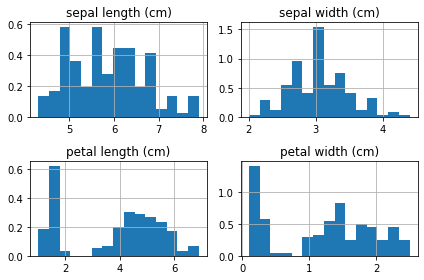

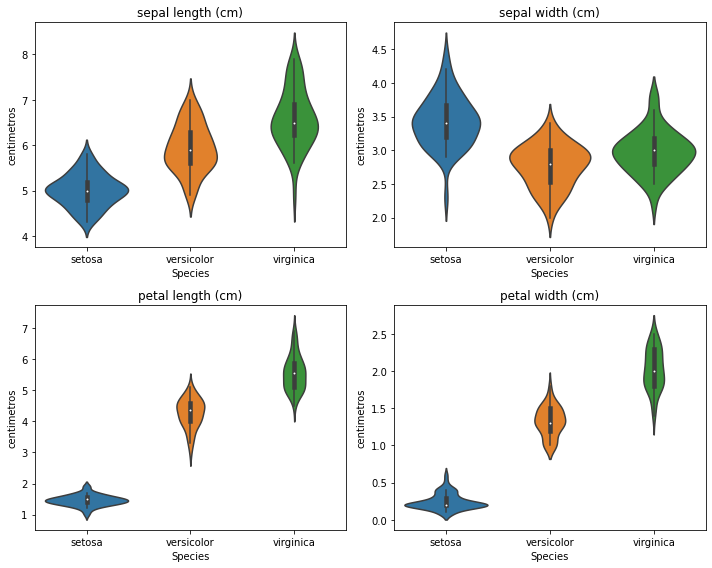

In [14]:
graph = df_iris.drop("Species", axis = 1)
graph.hist(bins = 15, density = True)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

#graficar
sns.violinplot(x='Species', y='sepal length (cm)', data=df_iris, ax = axes[0,0])
sns.violinplot(x='Species', y='sepal width (cm)', data=df_iris, ax = axes[0,1])
sns.violinplot(x='Species', y='petal length (cm)', data=df_iris, ax = axes[1,0])
sns.violinplot(x='Species', y='petal width (cm)', data=df_iris, ax = axes[1,1])

axes[0, 0].set_title('sepal length (cm)')
axes[0, 1].set_title('sepal width (cm)')
axes[1, 0].set_title('petal length (cm)')
axes[1, 1].set_title('petal width (cm)')

axes[0, 0].set_ylabel("centimetros")
axes[0, 1].set_ylabel("centimetros")
axes[1, 0].set_ylabel("centimetros")
axes[1, 1].set_ylabel("centimetros")

plt.tight_layout()
plt.show()

#### 3. Encuentre una relación o grafique las variables

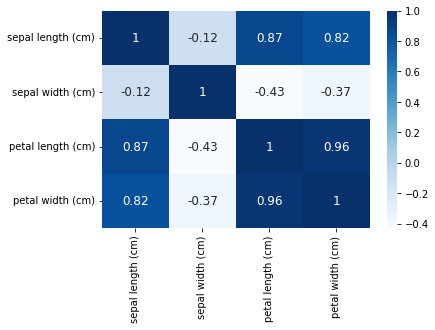

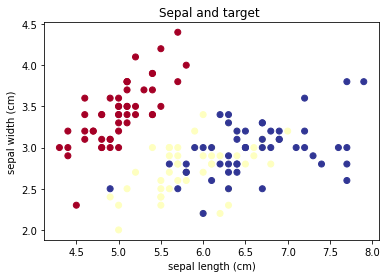

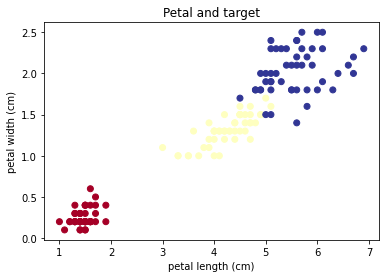

In [16]:
iris_data = df_iris.drop("Species", axis = 1)

sns.heatmap(iris_data.corr(),
            annot = True,
            annot_kws = {'size': 12},
            cmap = "Blues")
plt.show()

plt.scatter(data[:, 0], data[:, 1], c=target, cmap='RdYlBu')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Sepal and target ')
plt.show()

plt.scatter(data[:, 2], data[:, 3], c=target, cmap='RdYlBu')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('Petal and target')
plt.show()

#### 4. Determine cuántos k o clúster son adecuados para esta consulta.

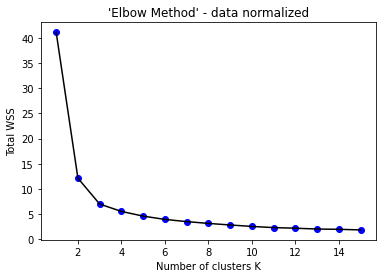

In [8]:
scaler = MinMaxScaler()

X_normalized = np.array(scaler.fit_transform(data))

k_max = 15
wss = np.zeros(k_max)

for k in range(1, k_max + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_normalized)
    wss[k-1] = kmeans.inertia_

plt.figure()
plt.plot(range(1, k_max + 1), wss, color='black')
plt.scatter(range(1, k_max + 1), wss, color='blue')
plt.title("'Elbow Method' - data normalized")
plt.xlabel("Number of clusters K")
plt.ylabel("Total WSS")
plt.show()

Disminuye considerablemente a partir del tercer cluster.

#### 5. Realice un modelo de k means con los cluster definidos en el punto 4.

In [23]:
k=3
kmeans_normalized = KMeans(
    n_clusters=k,
    n_init='auto',
    random_state=42
)

print(kmeans_normalized.fit(X_normalized))

y = kmeans_normalized.predict(X_normalized)
print("Categorías:")
print(np.unique(y))

intra_distances = []
cluster_labels = kmeans_normalized.labels_
cluster_centers = kmeans_normalized.cluster_centers_

for label in np.unique(cluster_labels):
    cluster_data = X_normalized[cluster_labels == label]
    centroid = cluster_centers[label]
    distance_matrix = pairwise_distances(cluster_data, [centroid])
    mean_distance = np.mean(distance_matrix)
    intra_distances.append(mean_distance)
  
for n_cluster, distance in enumerate(intra_distances):
    print(f'Intra-Cluster distance {n_cluster}: {distance:.4f}')

inter_distances = []

for i in range(len(cluster_centers)):
    for j in range(i+1, len(cluster_centers)):
        distance_matrix = pairwise_distances([cluster_centers[i]], [cluster_centers[j]])
        mean_distance = np.mean(distance_matrix)
        inter_distances.append(mean_distance)

for distance in inter_distances:
    print(f'Inter-Cluster distance: {distance:.4f}')

distances = pairwise_distances(X_normalized, kmeans_normalized.cluster_centers_)
squared_distances = distances**2
between_SS = np.sum(squared_distances)
total_SS = kmeans_normalized.inertia_
ratio = between_SS / total_SS
print(f'ratio between_SS / total_SS: {ratio:.4f}')

KMeans(n_clusters=3, n_init='auto', random_state=42)
Categorías:
[0 1 2]
Intra-Cluster distance 0: 0.2107
Intra-Cluster distance 1: 0.1639
Intra-Cluster distance 2: 0.2100
Inter-Cluster distance: 1.1757
Inter-Cluster distance: 0.4651
Inter-Cluster distance: 0.7929
ratio between_SS / total_SS: 33.7122


Es mejor usar datos normalizados

In [22]:
k=3
kmeans_standarized = KMeans(
    n_clusters=k,
    n_init='auto',
    random_state=42
)

print(kmeans_standarized.fit(X_standarized))

y = kmeans_standarized.predict(X_standarized)
print("Categorías:")
print(np.unique(y))

intra_distances = []
cluster_labels = kmeans_standarized.labels_
cluster_centers = kmeans_standarized.cluster_centers_

for label in np.unique(cluster_labels):
    cluster_data = X_standarized[cluster_labels == label]
    centroid = cluster_centers[label]
    distance_matrix = pairwise_distances(cluster_data, [centroid])
    mean_distance = np.mean(distance_matrix)
    intra_distances.append(mean_distance)
 
for n_cluster, distance in enumerate(intra_distances):
    print(f'Intra-Cluster distance {n_cluster}: {distance:.4f}')

inter_distances = []

for i in range(len(cluster_centers)):
    for j in range(i+1, len(cluster_centers)):
        distance_matrix = pairwise_distances([cluster_centers[i]], [cluster_centers[j]])
        mean_distance = np.mean(distance_matrix)
        inter_distances.append(mean_distance)

for distance in inter_distances:
    print(f'Inter-Cluster distance: {distance:.4f}')


distances = pairwise_distances(X_standarized, kmeans_standarized.cluster_centers_)
squared_distances = distances**2
between_SS = np.sum(squared_distances)
total_SS = kmeans_standarized.inertia_
ratio = between_SS / total_SS
print(f'ratio between_SS / total_SS: {ratio:.4f}')

KMeans(n_clusters=3, n_init='auto', random_state=42)
Categorías:
[0 1 2]
Intra-Cluster distance 0: 0.9129
Intra-Cluster distance 1: 0.8137
Intra-Cluster distance 2: 0.8573
Inter-Cluster distance: 3.9584
Inter-Cluster distance: 1.8203
Inter-Cluster distance: 3.0063
ratio between_SS / total_SS: 22.8981


In [20]:
matrix = np.array(X_normalized) 
out1 = pd.DataFrame({
    'sepal length (cm)': matrix[:, 0],
    'sepal width (cm)': matrix[:, 1],
    'petal length (cm)': matrix[:, 2],
    'petal width (cm)': matrix[:, 3],
    'cluster': kmeans_normalized.labels_.astype(int)})

correlacion = out1.corr()
correlacion_col = correlacion['cluster']

print(correlacion_col)

sepal length (cm)   -0.365602
sepal width (cm)    -0.390940
petal length (cm)   -0.173962
petal width (cm)    -0.229274
cluster              1.000000
Name: cluster, dtype: float64


Correlacion leve negativa y separacion por cluster exitosa.

#### 6. Entregue una representación gráfica de los cluster.

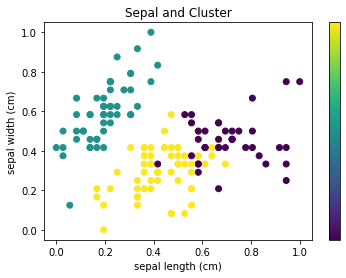

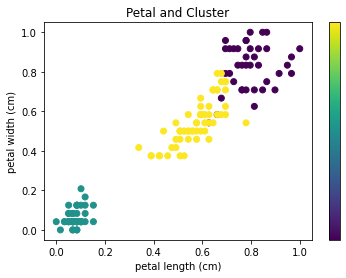

In [33]:
scatter = plt.scatter(out1['sepal length (cm)'], out1['sepal width (cm)'], c=out1['cluster'])
colorbar = plt.colorbar(scatter)
colorbar.set_ticks([])
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Sepal and Cluster')
plt.show()

scatter = plt.scatter(out1['petal length (cm)'], out1['petal width (cm)'], c=out1['cluster'])
colorbar = plt.colorbar(scatter)
colorbar.set_ticks([])
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('Petal and Cluster')
plt.show()